In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

mean = 490.7230769230769 days
median = 171.0 days


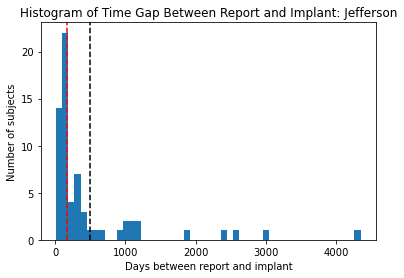

In [47]:
#Set to 'All' for aggregate data or a specific site name for site-only data
site = 'Jefferson'
sd = {'Jefferson', 'Dartmouth', 'Emory', 'UTSW'}

if (site != 'All'):
    df = pd.read_excel(r'./' + site + '_neuropsych.xlsx')

time_gap = []

#Will only include sites that have date of report extracted from REDCap
if site == 'All':
    for k in sd:
        try:
            df = pd.read_excel(r'./' + k + '_neuropsych.xlsx')
            for i in df.index:
                gap = df.iloc[i]['Time between report and implant (days)']
                if np.isnan(gap)==False:
                    time_gap.append(gap)
        except:
            print('Report dates not available for', k)
else:
    for i in df.index:
        gap = df.iloc[i]['Time between report and implant (days)']
        if np.isnan(gap)==False:
            time_gap.append(gap)
    
mean = np.mean(time_gap)
med = np.median(time_gap)
    
time_hist = plt.hist(time_gap, 50)
plt.xlabel('Days between report and implant')
plt.ylabel('Number of subjects')
plt.title('Histogram of Time Gap Between Report and Implant: '+ site)
plt.axvline(x=mean, color='k', linestyle='--')
plt.axvline(x=med, color='r', linestyle='--')
print('mean =', mean, 'days')
print('median =', med, 'days')

mean = 10.013513513513514
median = 8.0
74 of 84 subjects have BAI = 0.8809523809523809
74 of 84 subjects have both scores = 0.8809523809523809


11

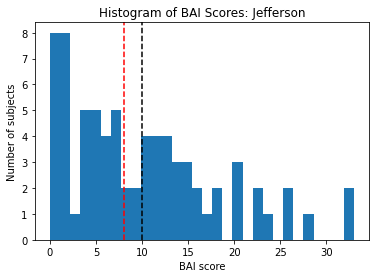

In [48]:
BAI = []
count = 0
both = 0
selected = 0
N = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx')
        for i in df.index:
            score = df.iloc[i]['BAI']
            if np.isnan(score)==False:
                BAI.append(df.iloc[i]['BAI'])
                count = count + 1
                if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
                if np.isnan(df.iloc[i]['BDI'])==False:
                    both = both + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BAI']
        if np.isnan(score)==False:
            BAI.append(df.iloc[i]['BAI'])
            count = count + 1
            if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
            if np.isnan(df.iloc[i]['BDI'])==False:
                both = both + 1
    N = len(df.index)
    
mean = np.mean(BAI)
med = np.median(BAI)
ratio = float(count/N)
brat = float(both/N)
    
time_hist = plt.hist(BAI, 30)
plt.xlabel('BAI score')
plt.ylabel('Number of subjects')
plt.title('Histogram of BAI Scores: '+ site)
plt.axvline(x=mean, color='k', linestyle='--')
plt.axvline(x=med, color='r', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BAI =', ratio)
print(both, 'of', N, 'subjects have both scores =', brat)
selected

mean = 11.378378378378379
median = 8.5
74 of 0 subjects have BDI = 0.8809523809523809


17

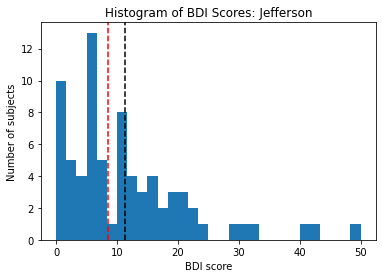

In [50]:
BDI = []
count = 0
N = 0
selected = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx')
        for i in df.index:
            score = df.iloc[i]['BDI']
            if np.isnan(score)==False:
                BDI.append(df.iloc[i]['BDI'])
                count = count + 1
                if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BDI']
        if np.isnan(score)==False:
            BDI.append(df.iloc[i]['BDI'])
            count = count + 1
            if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
                    
mean = np.mean(BDI)
med = np.median(BDI)
#ratio = float(count/N)
    
time_hist = plt.hist(BDI, 30)
plt.xlabel('BDI score')
plt.ylabel('Number of subjects')
plt.title('Histogram of BDI Scores: '+ site)
plt.axvline(x=mean, color='k', linestyle='--')
plt.axvline(x=med, color='r', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BDI =', ratio)
selected

In [45]:
norep = []
oldrep = []

df
for i in df.index:
    typ = df.iloc[i]['Type of report']
    gap = df.iloc[i]['Time between report and implant (days)']
    if typ=='None':
        norep.append(df.iloc[i]['Subject Number'])
    if gap > 182:
        oldrep.append(df.iloc[i]['Subject Number'])
len(oldrep)

30